In [45]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [46]:
df =pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


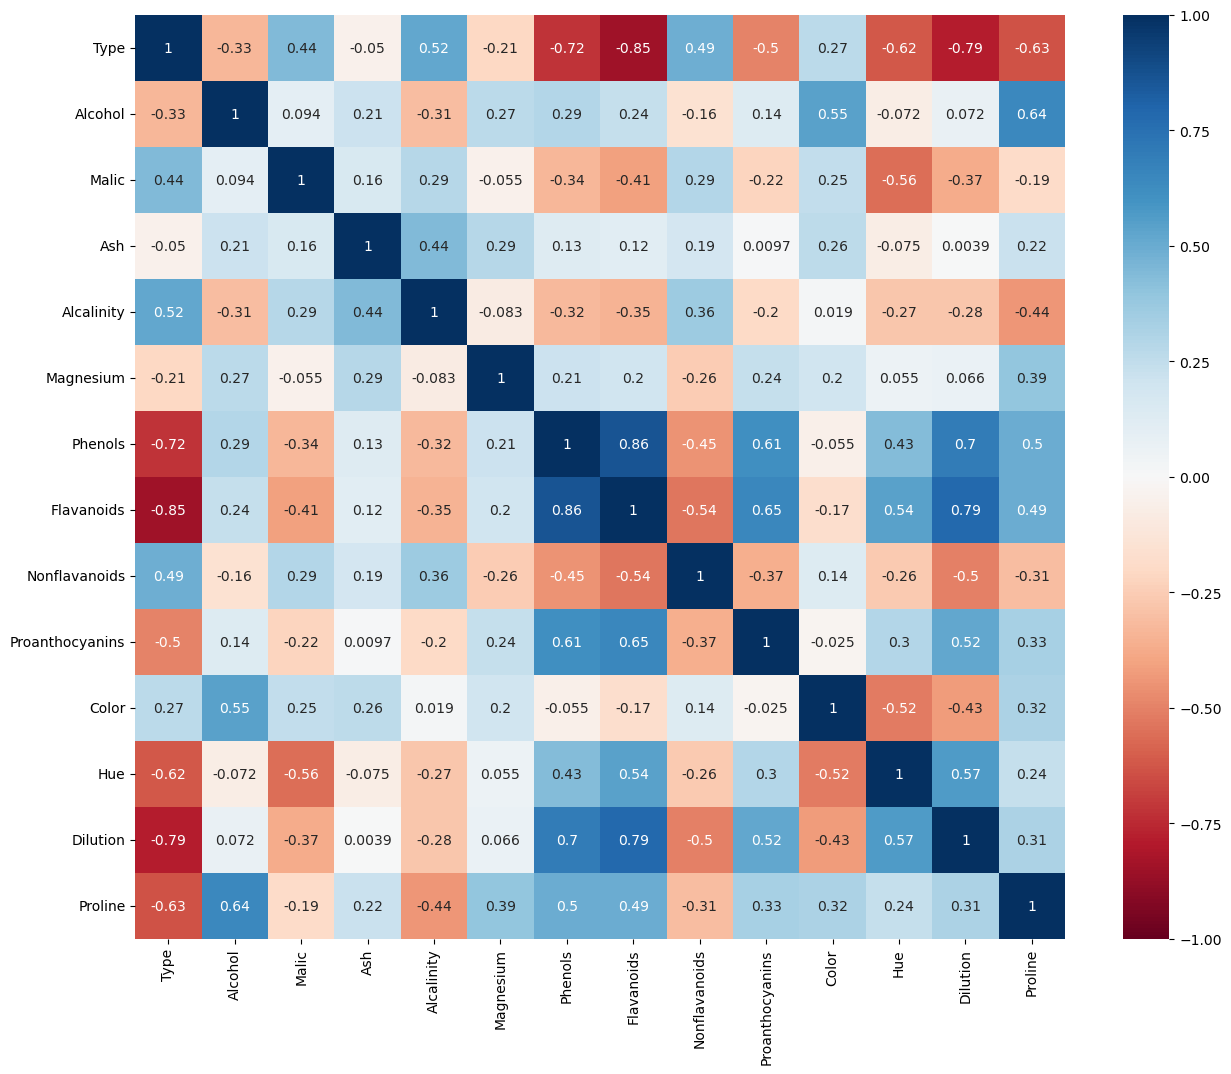

In [48]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu')
plt.show()

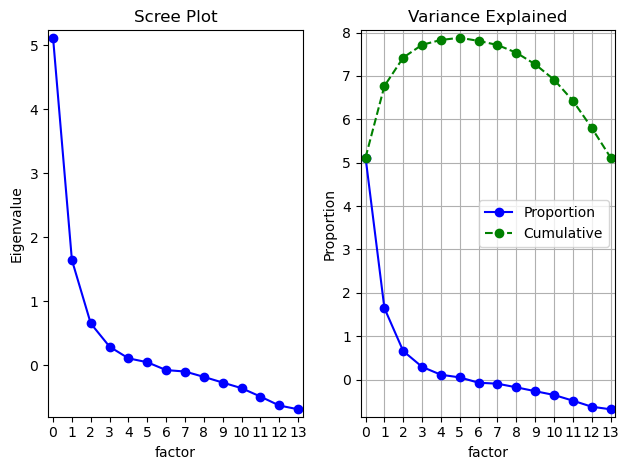

In [49]:
from statsmodels.multivariate.factor import Factor
model=Factor(df).fit()
model.plot_scree()
plt.grid()
plt.show()

In [50]:
from statsmodels.multivariate.pca import PCA

In [51]:
pc = PCA(df, 
         ncomp=3,
         standardize=True,  
         normalize=True,    
         missing=None,
        method='eig')

In [52]:
pca_result = pc.loadings.T
pca_result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
comp_0,-0.393670,0.136325,-0.222676,0.002258,-0.224298,0.124630,0.359264,0.390712,-0.267001,0.279063,-0.089318,0.276823,0.350526,0.269515
comp_1,0.005690,0.484161,0.223591,0.315856,-0.011616,0.300551,0.067120,-0.001313,0.026989,0.041223,0.529783,-0.277907,-0.162776,0.366059
comp_2,0.001218,-0.207401,0.088796,0.626102,0.611990,0.130985,0.146508,0.150963,0.169976,0.149880,-0.137266,0.085329,0.166204,-0.126687


In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

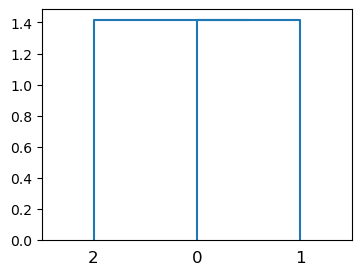

In [54]:
plt.figure(figsize = (4,3))
wardlink = linkage(pca_result,method = 'ward', metric='euclidean')
warddend = dendrogram(wardlink)

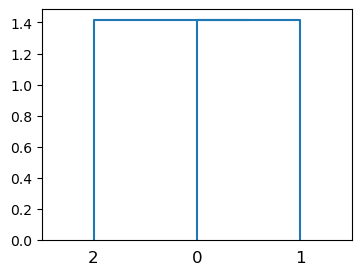

In [55]:
plt.figure(figsize = (4,3))
wardlink = linkage(pca_result,method = 'single', metric='euclidean')
warddend = dendrogram(wardlink)

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [57]:
# Calculate the total explained variance for different number of clusters
total_variance = []
for n_clusters in range(1, 4):  # Trying different number of clusters from 1 to 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_result)
    print(kmeans.inertia_)
    total_variance.append(kmeans.inertia_)  # Inertia represents total within-cluster sum of squares

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2.0
0.9999999999999992
0.0


In [58]:
kmeans.labels_

array([2, 1, 0])

In [59]:
total_variance

[2.0, 0.9999999999999992, 0.0]

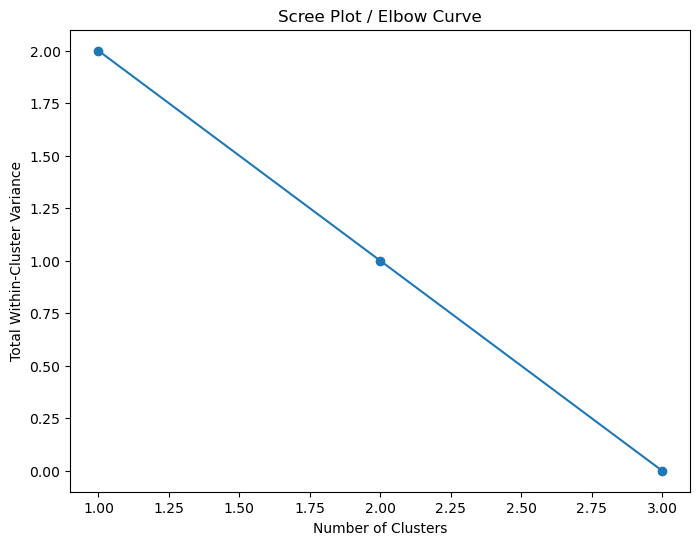

In [60]:
# Plot the scree plot (elbow curve)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 4), total_variance, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Total Within-Cluster Variance')
plt.title('Scree Plot / Elbow Curve')
plt.show()

In [61]:
from sklearn.cluster import AgglomerativeClustering, KMeans

# Optimum number of clusters (choose based on the scree plot)

# Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical_clustering.fit_predict(pca_result)

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

In [62]:
hierarchical_labels

array([2, 1, 0], dtype=int64)

In [63]:
kmeans_labels

array([2, 1, 0])

In [68]:
silhouette_score(pca_result,kmeans_labels)

ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
pca_result['kmeans'] = kmeans_labels
pca_result['hierarchical'] = hierarchical_labels

In [ ]:
pca_result